# 3 a)

In [1]:
from scipy.integrate import quad
import numpy as np
from astropy import units as u
from astropy import constants as const

# Integrating planck equation from 0 to $\infty$

### $$\displaystyle\int_0^{\infty}B_\nu(T)d\nu = \frac{2h}{c^2}\left(\frac{kT}{h}\right)^4\int_0^{\infty}\frac{x^3}{e^x-1}$$

### Analytical Solution yields

### $$\displaystyle\int_0^{\infty}B_\nu(T)d\nu = \frac{2h}{c^2}\left(\frac{kT}{h}\right)^4\cdot\frac{\pi^4}{15}$$


In [2]:
# Let's define some constants and convert to cgs units
h = const.h.cgs
c = const.c.cgs
k = const.k_B.cgs

# Assume T = 300 K
T = 300 * u.K

print("h = ", h)
print("c = ", c)
print("k = ", k)
print("T = ", T)



h =  6.62607015e-27 erg s
c =  29979245800.0 cm / s
k =  1.380649e-16 erg / K
T =  300.0 K


In [3]:
# Calculate the analytical solution
analytic_soln = (2*h/c**2) * (k*T/h)**4 * (np.pi**4/15)

# Analytical solution in cgs units
print("Analytical solution = ", analytic_soln)

Analytical solution =  146199.835115196 erg / (s cm2)


In [4]:
# Define constant in front of integral
iconst = (2*h/c**2) * (k*T/h)**4

/tmp/ipykernel_55377/2588663023.py:3: RuntimeWarning: invalid value encountered in divide
  y = x**3/(np.exp(x)-1)


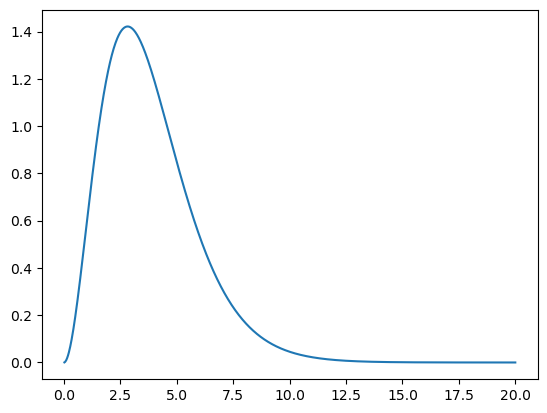

In [5]:
# Plot x^3/(exp(x)-1)
x = np.linspace(0, 20, 1000)
y = x**3/(np.exp(x)-1)

from matplotlib import pyplot as plt
plt.plot(x, y)
plt.show()



In [6]:

#Calculate the numerical integral
# Define the function to be integrated
def func(x):
    if x == 0 or x == np.inf:
        return 0
    else:
        return x**3/(np.exp(x) - 1)


# Integrate the function from 0 to infinity
integral_result, error = quad(func, 0, np.inf)

print("Numerical solution = ", iconst * integral_result)

Numerical solution =  146199.83511519607 erg / (s cm2)


/tmp/ipykernel_55377/1561282243.py:7: RuntimeWarning: overflow encountered in exp
  return x**3/(np.exp(x) - 1)


# 3 b)

### Analysis 

Differentiating $B_{\nu}(\nu,T)$ with respect to $\nu$ and equating to zero yeilds $x = 3(1 - e^x)$ where $x = \frac{h\nu}{kT}$


Simmillary Differentiating $B_{\lambda}(\lambda,T)$ with respect to $\lambda$ and equating to zero yeilds $y = 5(1 - e^y)$ where $y = \frac{hc}{\lambda kT}$

Below we solve these numerically

In [23]:
# Solving the equation x = 3(1 - exp(-x)) nunmerically
import scipy.optimize as opt
from IPython.display import display, Math
def func(x):
    return 3 - 3*np.exp(-x) - x

# Initial guess
x0 = 3

# Solve for y
x = opt.root(func, x0,method='hybr')

print('x = ',x.x[0])

# Calculate \nu/T to 3 significant figures

nu_T = x.x[0] * k/h


print(f'nu/T = {nu_T:.3g}')


x =  2.8214393721221787
nu/T = 5.88e+10 1 / (K s)


In [19]:
# Solving the equation y = 5(1 - exp(-y)) nunmerically
def func(y):
    return 5 - 5*np.exp(-y) - y

# Initial guess
y0 = 5

# Solve for y
y = opt.root(func, y0,method='hybr')

print('y = ',y.x[0])

# Calculate \lambda*T to 3 significant figures

lambda_T = h*c/(k*y.x[0])


display(Math(r'\lambda T =  {:.3g}'.format(lambda_T)))


y =  4.965114231744281


<IPython.core.display.Math object>

# 3 c)

### Analysis 

Differentiating $\frac{\delta B_{\nu}(\nu,T)}{\delta T}$ with respect to $\nu$ and equating to zero yeilds 

$2xe^x - (x+4)(e^x-1) = 0$ where $x = \frac{h\nu}{kT}$


Below we solve it numerically

In [32]:
def func(x):
    return 2*x*np.exp(x) - (x+4)*(np.exp(x)-1)

x0_tests = np.array([4, 5,6,7])
for x0 in x0_tests:
    x = opt.root(func, x0,method='hybr')

    print('x = ',x.x[0])

    # Calculate \nu/T to 3 significant figures

    nu_T = x.x[0] * k/h


    print(f'nu/T = {nu_T:.3g}')



x =  3.8300160963090732
nu/T = 7.98e+10 1 / (K s)
x =  3.8300160963090915
nu/T = 7.98e+10 1 / (K s)
x =  3.830016096309425
nu/T = 7.98e+10 1 / (K s)
x =  3.8300160963092256
nu/T = 7.98e+10 1 / (K s)
